# Ford GoBike System Data
## by Omar Ashraf Farouk

## Preliminary Wrangling

> This dataset contains data regarding Ford's GoBike system. The data revolves around the numerical deduced values of the bikes ranging from trip durations from target to endpoint stations, accompanied by categorical values describing the bike users and physical locations of interest that the bikes rest at.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.options.display.float_format = "{:,.2f}".format

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv('fordgobike.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


None

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.00,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,13.00,Commercial St at Montgomery St,37.79,-122.40,4902,Customer,"1,984.00",Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.00,The Embarcadero at Steuart St,37.79,-122.39,81.00,Berry St at 4th St,37.78,-122.39,2535,Customer,nan,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.00,Market St at Dolores St,37.77,-122.43,3.00,Powell St BART Station (Market St at 4th St),37.79,-122.40,5905,Customer,"1,972.00",Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.00,Grove St at Masonic Ave,37.77,-122.45,70.00,Central Ave at Fell St,37.77,-122.44,6638,Subscriber,"1,989.00",Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.00,Frank H Ogawa Plaza,37.80,-122.27,222.00,10th Ave at E 15th St,37.79,-122.25,4898,Subscriber,"1,974.00",Male,Yes


### What is the structure of your dataset?

> 16 columns describing a bike's duration of travel, starting and ending destinations accompanied by data regarding the user of the bike.

### What is/are the main feature(s) of interest in your dataset?

> The bikes, durations, starting times, end times, locations, gender & type of users.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

    > duration_sec  start_station_id	end_station_id  user_type  member_gender

#### > Dropping nan values from our dataset to work effectively 
  

In [3]:
df.dropna(inplace=True)
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.00,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,13.00,Commercial St at Montgomery St,37.79,-122.40,4902,Customer,"1,984.00",Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.00,Market St at Dolores St,37.77,-122.43,3.00,Powell St BART Station (Market St at 4th St),37.79,-122.40,5905,Customer,"1,972.00",Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.00,Grove St at Masonic Ave,37.77,-122.45,70.00,Central Ave at Fell St,37.77,-122.44,6638,Subscriber,"1,989.00",Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.00,Frank H Ogawa Plaza,37.80,-122.27,222.00,10th Ave at E 15th St,37.79,-122.25,4898,Subscriber,"1,974.00",Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.00,4th St at Mission Bay Blvd S,37.77,-122.39,323.00,Broadway at Kearny,37.80,-122.41,5200,Subscriber,"1,959.00",Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.00,Beale St at Harrison St,37.79,-122.39,324.00,Union Square (Powell St at Post St),37.79,-122.41,4832,Subscriber,"1,996.00",Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.00,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,66.00,3rd St at Townsend St,37.78,-122.39,4960,Subscriber,"1,984.00",Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.00,The Alameda at Bush St,37.33,-121.90,277.00,Morrison Ave at Julian St,37.33,-121.91,3824,Subscriber,"1,990.00",Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.00,San Pablo Ave at MLK Jr Way,37.81,-122.27,216.00,San Pablo Ave at 27th St,37.82,-122.28,5095,Subscriber,"1,988.00",Male,No


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### > Investigating the 'duration_sec' column by scaling it to a log function and plotting the occurences in a histogram.


In [4]:
mini=np.log10(df.duration_sec.describe())[3] # defining variables mini & maxi as the min and max values of the log scale
maxi=np.log10(df.duration_sec.describe())[7]

([<matplotlib.axis.XTick at 0x1761ba9fe48>,
 <a list of 5 Text xticklabel objects>)

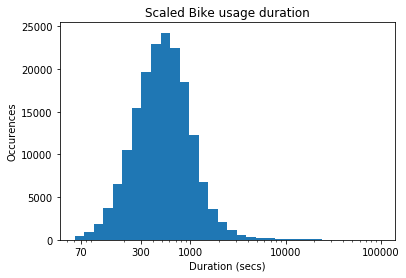

In [5]:
df.duration_sec.describe()
np.log10(df.duration_sec.describe())
bins = 10 ** np.arange(mini,maxi+0.1, 0.1)
plt.hist(data=df,x='duration_sec',bins=bins)
ticks = [70,300, 1000, 10000 ,100000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.title('Scaled Bike usage duration')
plt.xlabel('Duration (secs)')
plt.ylabel('Occurences')
plt.xticks(ticks, labels)

> This plot shows that most bike usage happens between 300 and 1000 seconds ( 5 mins and 16.67 mins )

In [6]:
ss_order = df.start_station_name.value_counts().iloc[:15].index
base_color=sb.color_palette()[0]
def forlabel(plt,title,xlabel,ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

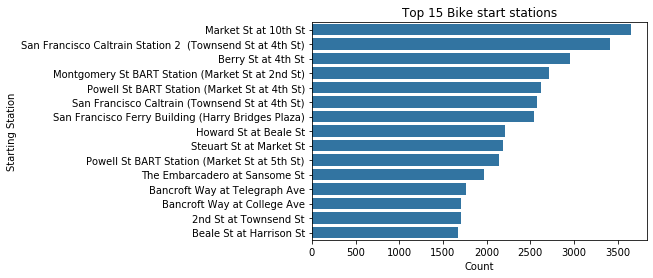

In [7]:
sb.countplot(data=df,y='start_station_name',order=ss_order,color=base_color)
forlabel(plt,'Top 15 Bike start stations','Count','Starting Station')

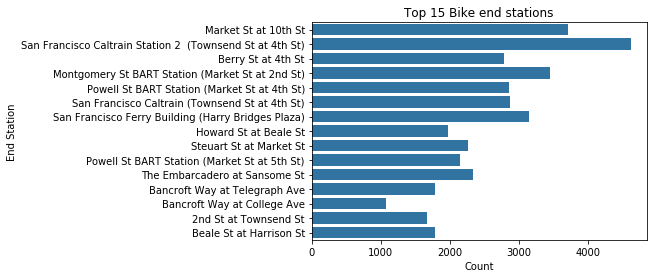

In [8]:
sb.countplot(data=df,y='end_station_name',order=ss_order,color=base_color)
forlabel(plt,'Top 15 Bike end stations','Count','End Station')

> By Plotting the the top 15 start and end station occurences for a bike journey, we can observe stations reoccuring at the top in both plots implying that they are frequent in traffic and central.

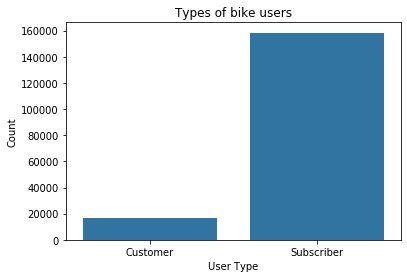

In [9]:
sb.countplot(df.user_type,color=base_color)
forlabel(plt,'Types of bike users','User Type','Count')

> Subscribers are often the users by a significant difference

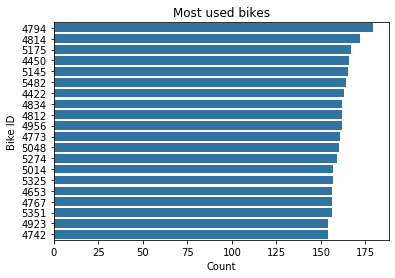

In [10]:
bike_order = df.bike_id.value_counts().iloc[:20].index
sb.countplot(y=df.bike_id,color=base_color,order=bike_order)
forlabel(plt,'Most used bikes','Count','Bike ID')

> Most used bikes over the years

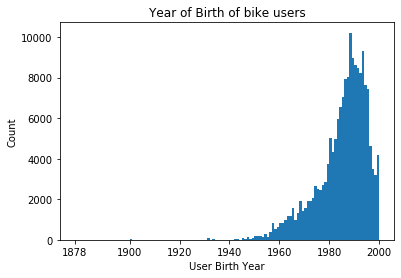

In [11]:
plt.hist(df.member_birth_year,bins=np.arange(1878,2001,1))
ticks=[1878,1900,1920,1940,1960,1980,2000]
labels=['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
forlabel(plt,'Year of Birth of bike users','User Birth Year','Count')


> An expected age group from year 1980 - 2000 are the most frequent to bike 
!

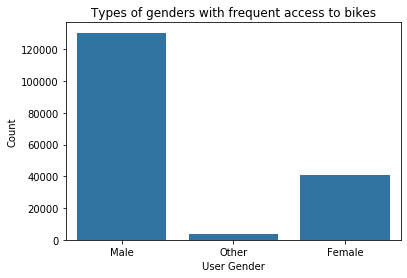

In [12]:
sb.countplot(df.member_gender,color=base_color)
forlabel(plt,'Types of genders with frequent access to bikes','User Gender','Count')

> Number of Males to Females is greater when it comes to accessing bikes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Regarding Unusual points,there were users with birth years from the 1800's and onwards which was exceptionally odd !. Also, genders specified as other that do not give us coinsice information.
> In the 'duration_sec' column I have transformed it to a logarithmic scale and tweaked the ticks and size of the plot to extract usable insight.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I have dropped rows with null values to ease the process of analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [13]:
df['duration_min']=df['duration_sec']/60

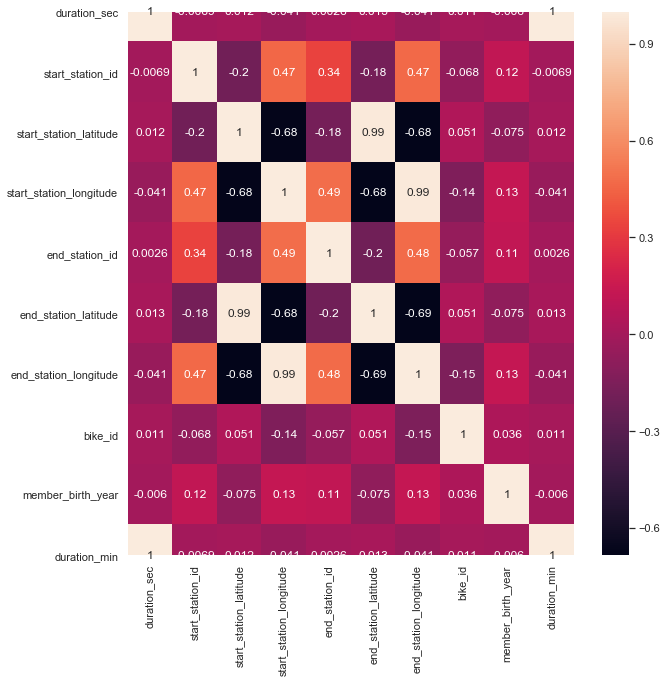

In [14]:
sb.set(rc = {'figure.figsize':(10,10)})
sb.heatmap(df.corr(),annot=True)

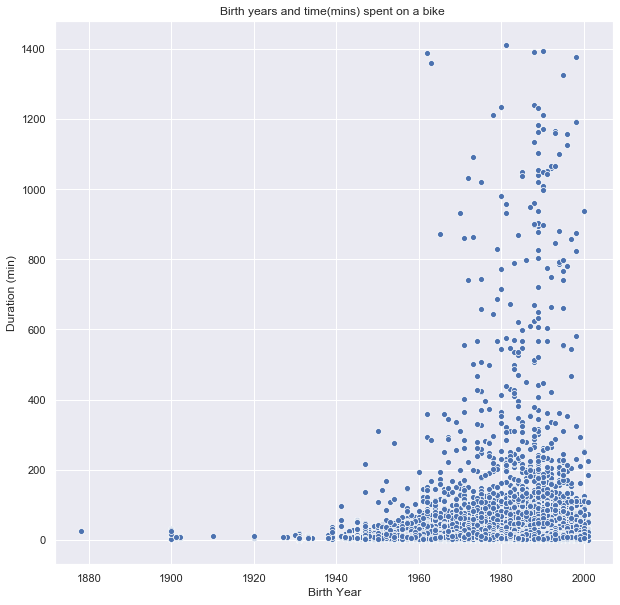

In [15]:
sb.scatterplot(data=df,x='member_birth_year',y='duration_min')
forlabel(plt,'Birth years and time(mins) spent on a bike ','Birth Year','Duration (min)')

> Our data suggests that a great chunk of activity on bikes is dependant on a young adult age, more young adults tend to spend greater time on the bike in comparison to old and very young individuals. We can observe that since 1940 to 1980 an increase of time spent is noticed then a small slight steady fall is observed up to 2000.

> Many data points seem to be outliers to our dataset, individuals born on 1900 and below seem rather unbelievable ! 

> Others have a vast amount of time spent (upto 16 - 20 hrs on a bike !) this is quiet surreal and definetly depends on other factors, since our main chunk revolves between 1960 - 2000 with up 200 mins on a bike.

> #### Does the gender and type of user aspect have any roles in deciding our time spent in regard to age ?

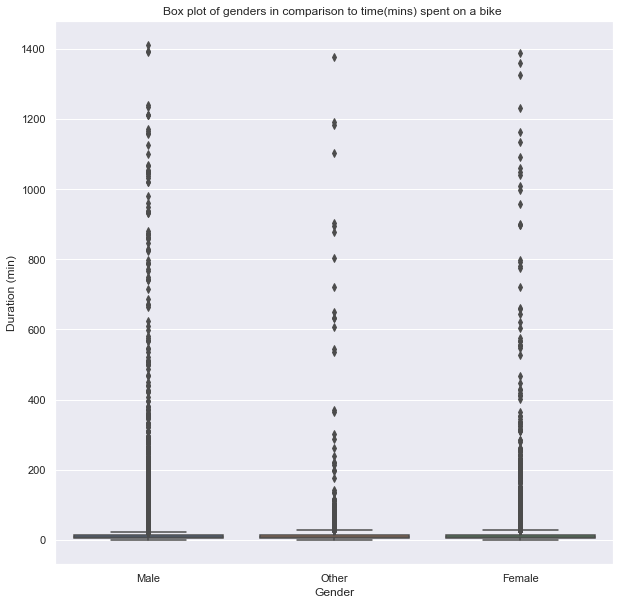

In [16]:
sb.boxplot(data=df,x='member_gender',y='duration_min')
forlabel(plt,'Box plot of genders in comparison to time(mins) spent on a bike ','Gender','Duration (min)')

> Most of the data in the previous plot seems condensed in the first section between 0 - 200 mins , so I made a new dataframe consisting of only observations just under an hour.

In [17]:
df2=df.query('duration_min<=60')

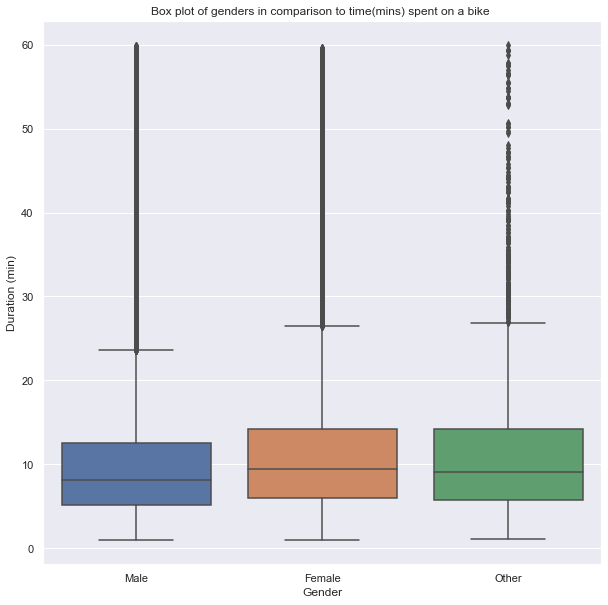

In [18]:
sb.boxplot(data=df2,x='member_gender',y='duration_min')
forlabel(plt,'Box plot of genders in comparison to time(mins) spent on a bike ','Gender','Duration (min)')

> By eliminating very high bike riding minutes we can observe that females have a higher time spent on bikes in regards to males, although slightly it may turn out significant.

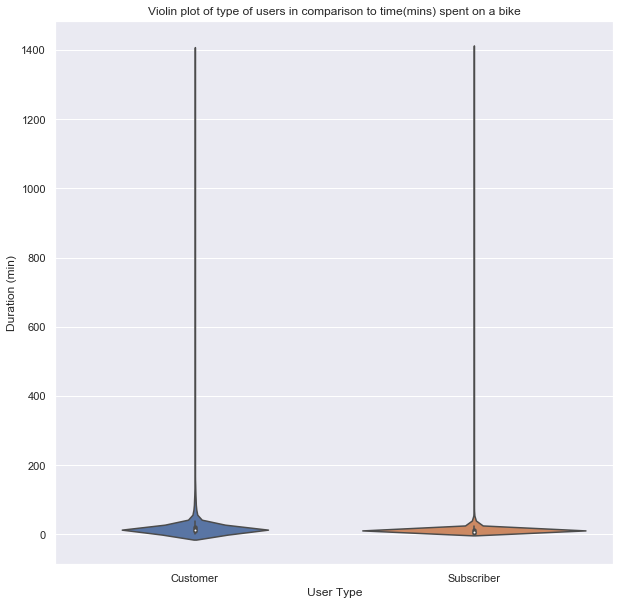

In [19]:
sb.violinplot(data=df,x='user_type',y='duration_min')
forlabel(plt,'Violin plot of type of users in comparison to time(mins) spent on a bike','User Type','Duration (min)')

> The same issue of a compressed plot is observed due to the great sheer number of bike time durations, the same issue will be resolved by eliminating high time in the next plot.

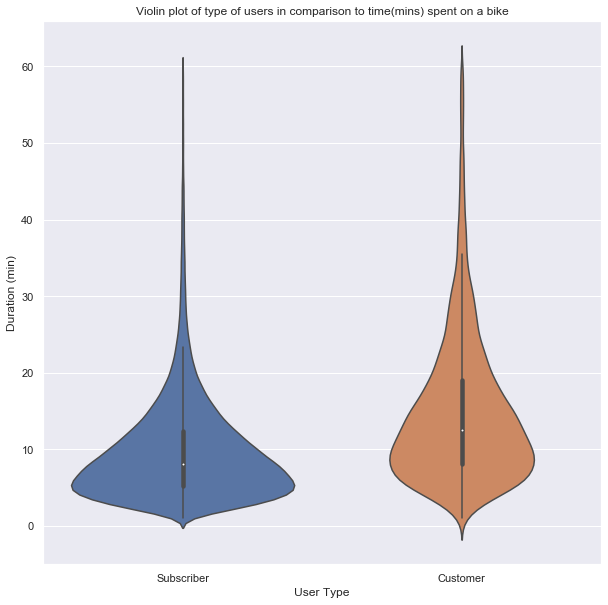

In [20]:
sb.violinplot(data=df2,x='user_type',y='duration_min')
forlabel(plt,'Violin plot of type of users in comparison to time(mins) spent on a bike','User Type','Duration (min)')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The majority of bike rentals in our overall dataset mostly revolved around less than 300 mins, which allowed me to zoom in on the duration_min further and bound the duration to be under an hour mark and deduce that many points act as outliers in our dataset.

> Decreasing our time frame allowed us to plot much more reasonable responses on box and violin plots for gender and type of users.

> Customers usually spend a slightly larger time than subscribers. 

> Females on average spend more time than males by a small amount of time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Time spent by subscribers is less than customers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\Omar Ashraf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


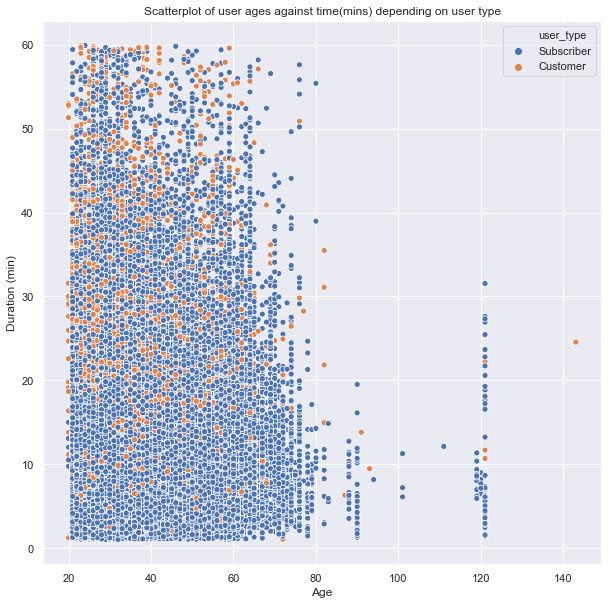

In [21]:
df['age']=2021-df.member_birth_year
df2['age']=2021-df2.member_birth_year
sb.scatterplot(data=df2,x='age',y='duration_min',hue=df2.user_type)
forlabel(plt,'Scatterplot of user ages against time(mins) depending on user type','Age','Duration (min)')

> Using the same procedure of limiting our time (min) axis to be just around the hour mark and transforming year of birth to a discrete age feature allows for easier interpretation of age groups and user types in comparison to minutes.

> Here we can observe that customers tend to appear in greater volume just about after the 25 min mark, while subsribers are distributed in a general fashion across all time stamps.

> ### What would appear if we incorporate gender in the previous plot ? 

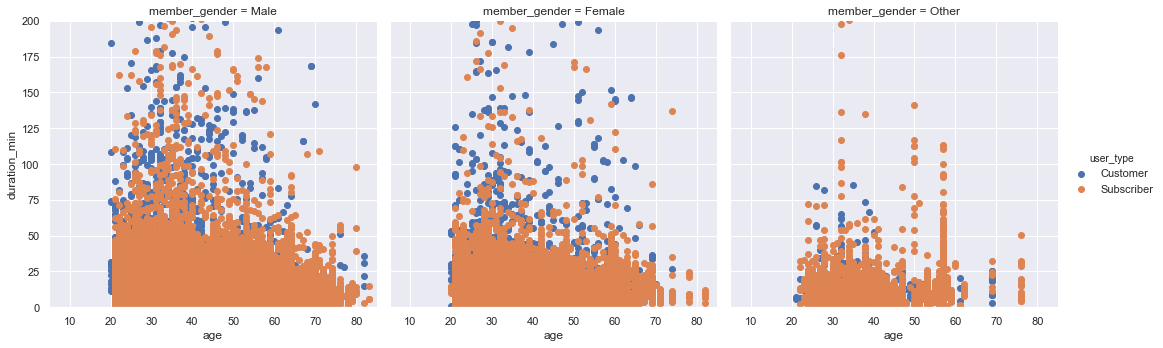

In [22]:
g=sb.FacetGrid(data=df,col='member_gender',hue='user_type',col_order=['Male','Female','Other'],height=5,xlim=[5,85],ylim=[0,200])
g.map(plt.scatter,'age','duration_min')
g.add_legend()
plt.show()


> Males appear to cover a larger age span than females, between the 70 - 80 year old we observe a high amount of males to females. It would be interesting if we had the same count of males to females in order to extract more insights.

>Subscribers appear grounded regardless of gender and fall mainly bellow the 70 min mark, although a dispersion is observed in a greater volume in males in contrast to females but this can be assumed due to the number of male samples to females.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Subscribers tendancy to be on the lower half of the time spent on the bike compared to regular customers stays strong, as well as by the age progression in both males and females we observe a reduced time spent on the bike allover.

> Less females are observed with an age between 70 - 80 compared to males.

### Were there any interesting or surprising interactions between features?

> By the data extracted as is and without further depth into specific timeframes such as ( Hours / Days / Weeks / Months ) all the data point to the same conclusions deduced in previous questions.

In [23]:
!jupyter nbconvert --to html exploration_template.ipynb

[NbConvertApp] Converting notebook exploration_template.ipynb to html
[NbConvertApp] Writing 1264485 bytes to exploration_template.html
